<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


###give dataset is tab seperated its not in csv file.so we are giving names to columns which are tab(' ') seperated;

In [2]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##Experimental Data Analysis

In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.groupby(by='label').describe()  #all the unique label put together and show they details;

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
messages['length']= messages['message'].apply(len) # finding length of each message
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#Data Visualition

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

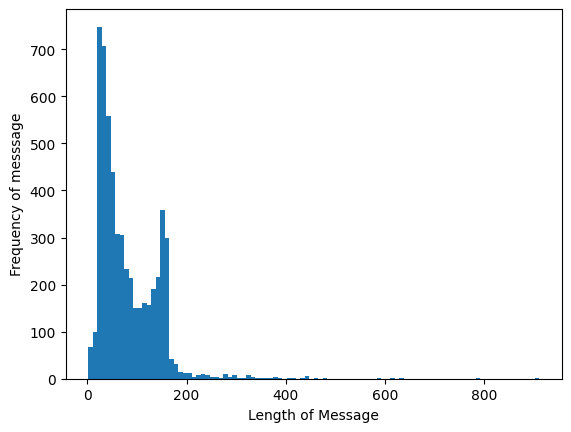

In [8]:
messages['length'].plot(bins=100,kind='hist')
plt.xlabel("Length of Message")
plt.ylabel("Frequency of messsage")
plt.show()

In [9]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [10]:
messages[messages['length']==910]['message'].iloc[0] # first conduction next which column you
#               dataframe          column      index

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

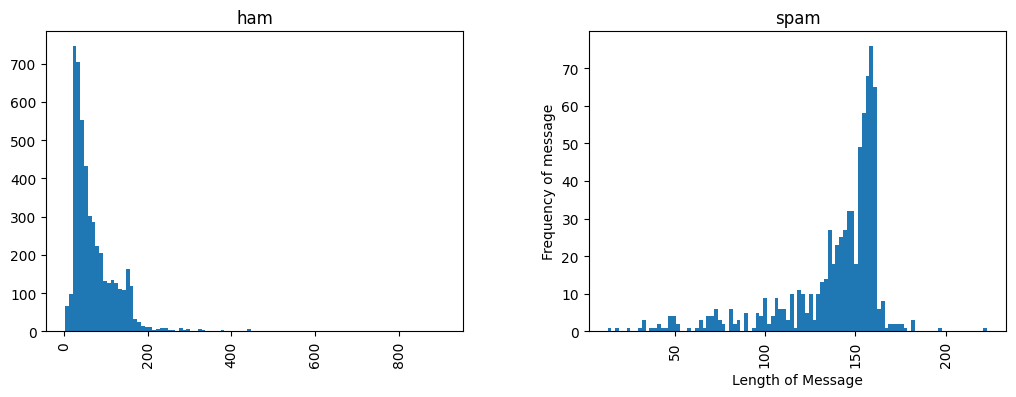

In [11]:
#plot the histogram for length and compare between ham and spam

messages.hist(column='length', by='label', bins=100,figsize=(12,4))   # when you want to know about column by groupby  or more colums use <dataframe name>.hist(column=<name>,by=)
plt.xlabel("Length of Message")
plt.ylabel("Frequency of message")
plt.show()

**Frequency of short messages are more in ham,  Frequency of large messages are hight in spam**

# Text Processig

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
#break the sentence into words and rremove the words which are in stopwords
stopwords=nltk.corpus.stopwords.words('english') # stopwords is the list of words contains all the stopwords;
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
import string
punctuations=string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [15]:
sentence="heloo!! kasi how are doing?"
words=sentence.lower().split()
sentence=' '.join([word for word in words if word not in stopwords])
print(sentence)

heloo!! kasi doing?


In [16]:
print(''.join([char for char in sentence if char not in punctuations]))

heloo kasi doing


In [17]:
#messages['message'].apply(lambda x:''.join([char for char in x if char not in punctuations]))
#messages['message'].lower().split()
def text_process(message):
  nopunc=''.join([char for char in message if char not in punctuations])
  return ([words for words in nopunc.lower().split() if words not in stopwords])


In [18]:
messages["message"]=messages['message'].apply(text_process)
messages['message'].iloc[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

#vectorisation

## Three steps to convert lemmatization


*  Count how many times does a word occur in each message(Tf)
*  weight the count so that frequent tokens get lower weight
(Inverse document frequency(Idf)



In [19]:
from sklearn.feature_extraction.text import CountVectorizer # Countvectorizer is a matrix contains lot of zeros also called sparce matrix

In [20]:
# Transform a new message
message = "This is a new message."
bow_vector = bow_transformer.transform([message])
print(bow_vector)
# Print the sparse matrix representation of the transformed message


NameError: name 'bow_transformer' is not defined

In [21]:
#messages["message"] = messages["message"].apply(lambda x: x.split())
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages["message"])

In [22]:
print(bow_transformer)

CountVectorizer(analyzer=<function text_process at 0x7ec067bb5900>)


In [23]:
len(bow_transformer.vocabulary_)

5112

In [24]:
message4=messages['message'][3]
print(message4)

['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']


In [25]:
bow4=bow_transformer.transform([message4])
print(bow_transformer.transform([message4]))


  (0, 4265)	1


In [26]:
word = bow_transformer.vocabulary_.get(100)
print(word)

None


giving no of alpha bets are repeted in message

In [27]:
print(bow_transformer.get_feature_names_out()[1279])

gojurongpointcrazyavailablebugisngreatworldlaebuffetcinegotamorewat


In [28]:
messages_bow=bow_transformer.transform(messages['message'])
messages_bow.shape

(5572, 5112)

In [31]:
print(messages_bow)

  (0, 1279)	1
  (1, 3031)	1
  (2, 1123)	1
  (3, 4265)	1
  (4, 2729)	1
  (5, 1140)	1
  (6, 1013)	1
  (7, 3178)	1
  (8, 4727)	1
  (9, 2665)	1
  (10, 2026)	1
  (11, 3671)	1
  (12, 4366)	1
  (13, 2137)	1
  (14, 711)	1
  (15, 4821)	1
  (16, 2910)	1
  (17, 973)	1
  (18, 1080)	1
  (19, 990)	1
  (20, 3582)	1
  (21, 2148)	1
  (22, 5092)	1
  (23, 121)	1
  (24, 1063)	1
  :	:
  (5547, 625)	1
  (5548, 4222)	1
  (5549, 2300)	1
  (5550, 641)	1
  (5551, 4675)	1
  (5552, 3480)	1
  (5553, 1492)	1
  (5554, 4648)	1
  (5555, 4912)	1
  (5556, 4971)	1
  (5557, 2592)	1
  (5558, 3744)	1
  (5559, 266)	1
  (5560, 243)	1
  (5561, 1216)	1
  (5562, 3045)	1
  (5563, 264)	1
  (5564, 890)	1
  (5565, 1925)	1
  (5566, 3415)	1
  (5567, 46)	1
  (5568, 5068)	1
  (5569, 3196)	1
  (5570, 1458)	1
  (5571, 3446)	1


In [32]:
messages_bow.nnz # no of non zeros occurences in sparse matrix;

5567

#step 2
* weight the count so that frequent tokens get lower weight (Inverse document frequency(Idf)
* TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [35]:
tfidf4=tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 4265)	1.0


In [36]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]

8.527076498901426

In [37]:
messages__tfidf=tfidf_transformer.transform(messages_bow)

In [38]:
messages__tfidf.shape

(5572, 5112)

#Train the model (wrong way )
** we should not use whole data for traing the model
now machine can be understand the english tearms with the importance in a message compared to the whole data because of tfidf values

In [39]:

from sklearn.naive_bayes import MultinomialNB
spam_dectector=MultinomialNB().fit(messages__tfidf,messages['label'])

Lets try some random message and put into ML model and check

In [40]:
print('predicted',spam_dectector.predict(tfidf4))
print('expected',messages.label[4])

predicted ['ham']
expected ham


In [41]:
all_prediction = spam_dectector.predict(messages__tfidf)


In [42]:
from sklearn.metrics import classification_report
print(classification_report(messages['label'],all_prediction))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      4825
        spam       1.00      0.04      0.07       747

    accuracy                           0.87      5572
   macro avg       0.94      0.52      0.50      5572
weighted avg       0.89      0.87      0.82      5572



In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(messages['label'],all_prediction)

array([[4825,    0],
       [ 718,   29]])

In [44]:
#very bad model 718 wrong estimations

# Train test split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.2)

In [47]:
len(msg_train)

4457

In [48]:
len(msg_test)

1115

# Creating a Data Pipeline

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [51]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ec067bb5900>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [52]:
predictions=pipeline.predict(msg_test)

In [53]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.88      0.93      1114
        spam       0.01      1.00      0.01         1

    accuracy                           0.88      1115
   macro avg       0.50      0.94      0.47      1115
weighted avg       1.00      0.88      0.93      1115



In [54]:
confusion_matrix(predictions,label_test)

array([[976, 138],
       [  0,   1]])